#### Plotting a sigmoid function 2D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x) = \frac{1}{1 + e^{-(wx+b)}}$

In [ ]:
def sigmoid(x,w,b):
  return 1/(1 + np.exp(-(w * x + b)))

In [ ]:
sigmoid(1,0.5,0)

0.6224593312018546

In [ ]:
w = 0.9
b = 0.1
X = np.linspace(-10,10,100)
y = sigmoid(X,w,b) 

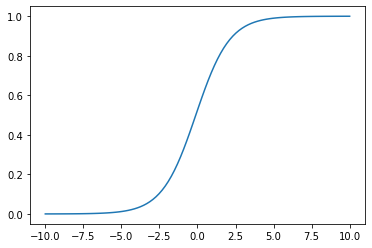

In [ ]:
plt.plot(X,y)
plt.show()

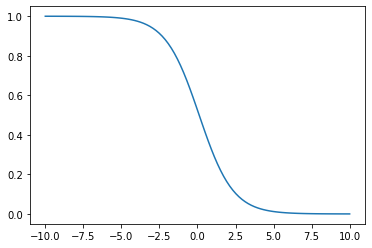

In [ ]:
w = -0.9
b = 0.1
X = np.linspace(-10,10,100)
y = sigmoid(X,w,b) 

plt.plot(X,y)
plt.show()

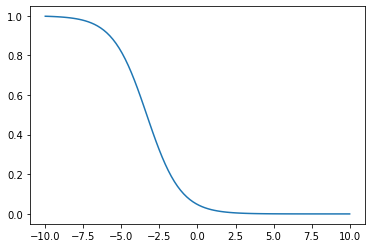

In [ ]:
w = -0.9
b = -3
X = np.linspace(-10,10,100)
y = sigmoid(X,w,b) 

plt.plot(X,y)
plt.show()

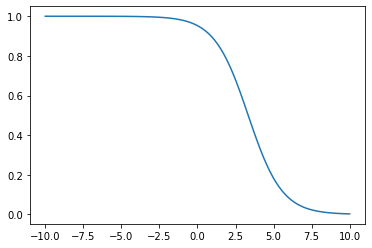

In [ ]:
w = -0.9
b = 3
X = np.linspace(-10,10,100)
y = sigmoid(X,w,b) 

plt.plot(X,y)
plt.show()

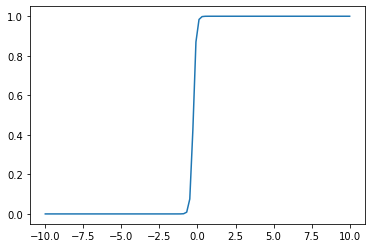

In [ ]:
w = 10.9
b = 3
X = np.linspace(-10,10,100)
y = sigmoid(X,w,b) 

plt.plot(X,y)
plt.show()

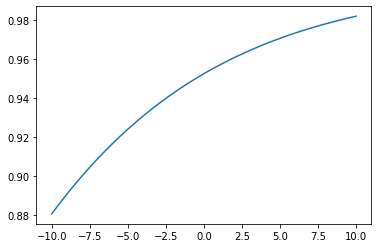

In [ ]:
w = 0.1
b = 3
X = np.linspace(-10,10,100)
y = sigmoid(X,w,b) 

plt.plot(X,y)
plt.show()

As we can see based on the values of w and b the graph changes accordingly.

Case 1 : Value of w is positive. So the graph goes from bottom left to top right.

Case 2 : Value of w is negative. So the graph goes from top left to bottom right.

Case 3 : Value of b is negative. So the graph extends on the right part.

Case 4 : Value of b is positive. So the graph extends on the left part.

Case 5 : Value of w is high. So the curve is very steep.  

Case 6 : Value of w is low. So the curve gradually descends.  

w controls the rate at which the graph is falling from one end to other end. Higher the value of w, the more steeper the curve.

b controls the position of the fall with respect to x axis

#### Plotting a sigmoid function 3D

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$ 

In [ ]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))


In [ ]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [ ]:
from mpl_toolkits import mplot3d
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
XX1, XX2 = np.meshgrid(X1,X2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [ ]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

Text(0.5, 0, 'y')

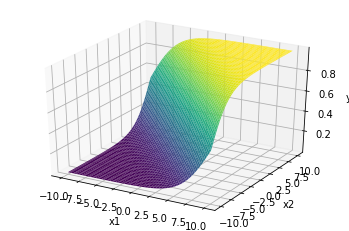

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1,XX2,Y,cmap = 'viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [ ]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

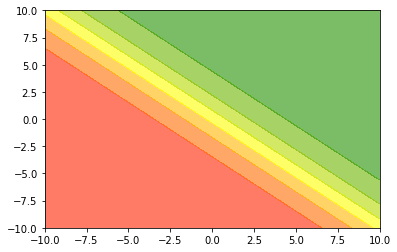

In [ ]:
# green is 1 and red is 0
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha=0.6)
plt.show()

### Compute Loss for a given dataset

In [ ]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 - 10
Y = sigmoid(X,w_unknown,b_unknown)

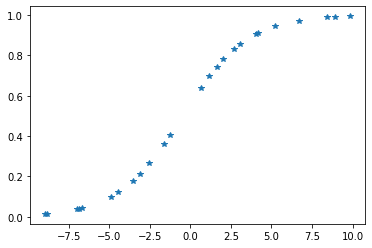

In [ ]:
plt.plot(X,Y,'*')
plt.show()

Given values of X,Y. find values of w,b using Brute Force

In [ ]:
def calculate_loss(X, Y, w_estimate, b_estimate):
  loss = 0
  for x,y in zip(X,Y):
    predicted_y = sigmoid(x, w_estimate, b_estimate)
    loss = loss + ((y - predicted_y) ** 2)
  return loss

In [ ]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)
WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape) 

In [ ]:
WW.shape

(100, 100)

In [ ]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

<Figure size 432x288 with 0 Axes>

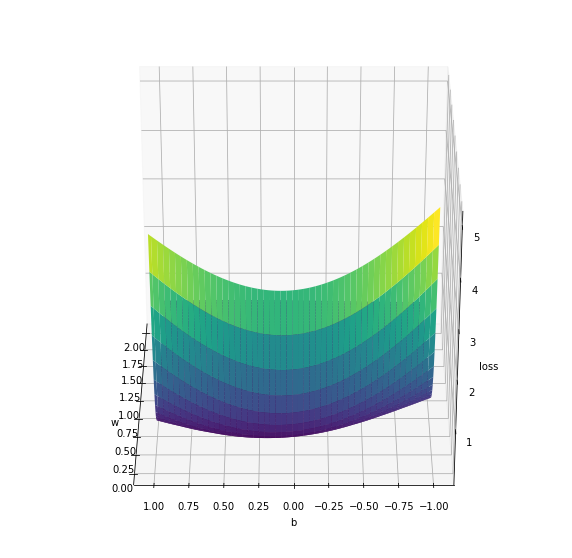

In [ ]:
# bias persepective - We are looking the graph from the bias side
# Somewhere around b = 0.25 we get minimum loss
fig = plt.figure()
plt.figure(figsize=(10, 10))
ax = plt.axes(projection = '3d')
ax.plot_surface(WW,BB,Loss,cmap = 'viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.view_init(30,180)

<Figure size 432x288 with 0 Axes>

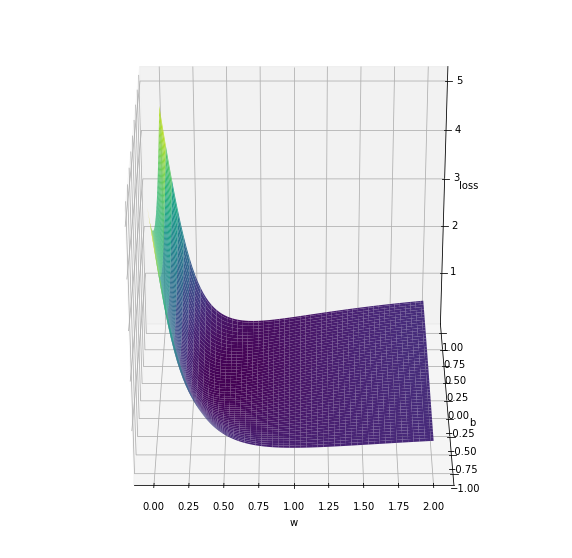

In [ ]:
# weight persepective - We are looking the graph from the weight side
# Somewhere around w = 0.5 the loss appears to be minimum
fig = plt.figure()
plt.figure(figsize=(10, 10))
ax = plt.axes(projection = '3d')
ax.plot_surface(WW,BB,Loss,cmap = 'viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.view_init(30, 270)

In [ ]:
# Find the values of w,b for which loss is minimum. For that we need to find the minimum element in the loss matrix and 
# get i,j values for that minimum element and map it to WW, BB to get the weight and bias values.
# argmin gives the number of element in that particular array  

ij = np.argmin(Loss)
print(ij)
print(Loss.shape)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

6225
(100, 100)


In [ ]:
WW[i,j], BB[i,j]

(0.5050505050505051, 0.2525252525252526)

### Class for Sigmoid neuron

In [ ]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return np.dot(x,self.w.T) + self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):

    # intialise w,b
    if initialise:
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0

    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total=epochs ,unit='epoch'):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db 

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      plt.ylabel('Mean squared error')
      plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred) 

### Fit for Toy data

In [ ]:
X = np.asarray([[2.5, 2.5],[4,-1],[1,-4],[-3,1.25],[-2,4],[1,5]])
Y = [1,1,1,0,0,0]

In [ ]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?epoch/s]

In [ ]:
sn.w, sn.b

(array([[ 3.27034963, -1.05711392]]), array([-0.00354347]))

In [ ]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[-0.74259087 -0.31123241]] [-0.00166615]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.03543902 -1.04865013]] [-0.03444058]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.34751911 -0.9947302 ]] [0.02248138]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.60308493 -0.78955593]] [0.10853852]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.8819961  -0.53377522]] [0.21259914]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.95977315 -0.54339264]] [0.22955786]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.01481958 -0.5767113 ]] [0.23779598]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.06551156 -0.59995982]] [0.2466376]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.11015893 -0.62184028]] [0.25429444]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.15046223 -0.64162786]] [0.26125056]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.18719878 -0.659754  ]] [0.26760981]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.2209651  -0.67647923]] [0.27346678]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.2522136  -0.69200547]] [0.27889468]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.28129715 -0.70649283]] [0.28395155]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.30849721 -0.72007069]] [0.28868422]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.33404244 -0.73284535]] [0.29313114]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.35812145 -0.74490525]] [0.29732423]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.38089188 -0.7563249 ]] [0.30129034]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.40248695 -0.76716766]] [0.30505229]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.42302034 -0.7774879 ]] [0.30862959]


  0%|          | 0/1 [00:00<?, ?epoch/s]

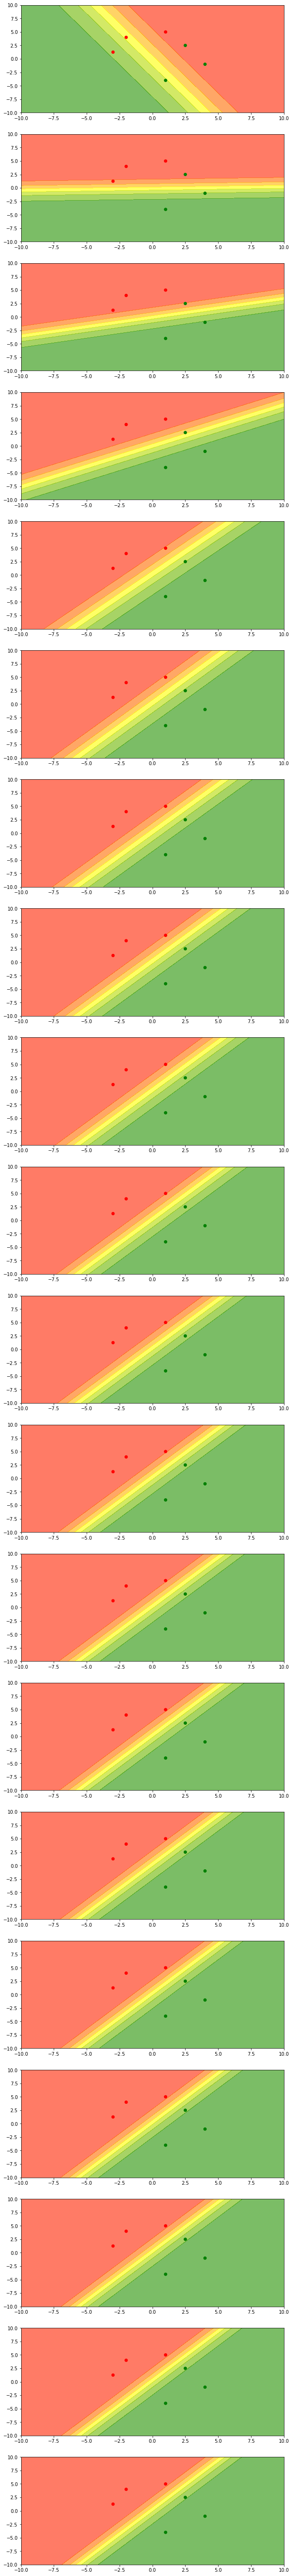

In [ ]:
sn.fit(X,Y,1,0.05,True)
N = 20
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.75,False)

Load Data

File available in Deep Learning/ Sigmoid Neuron Folder

In [ ]:
import pandas as pd
data = pd.read_csv("mobile_cleaned.csv", error_bad_lines=False)
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [ ]:
X = data.drop('Rating',axis=1)
Y = data['Rating'].values

In [ ]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [ ]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [ ]:
y_binarised = data['Class'].values

### Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
R = np.random.random([100,1])

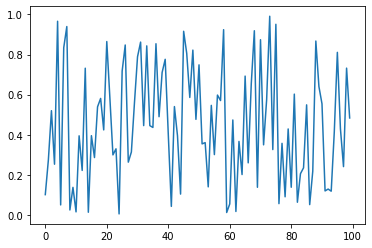

In [ ]:
plt.plot(R)
plt.show()

In [ ]:
np.mean(R)

0.4517731097595791

In [ ]:
np.std(R)

0.2856424197822419

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.mean_

array([0.45177311])

In [ ]:
RT = scaler.transform(R)

In [ ]:
np.mean(RT)

-3.4458547126803294e-16

In [ ]:
np.std(RT)

0.9999999999999998

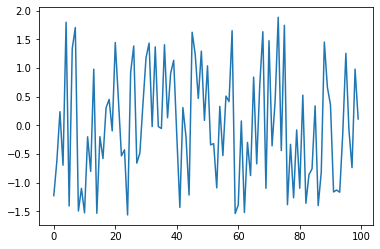

In [ ]:
plt.plot(RT)
plt.show()

We should always do train-test split and then standardise.

We need to use the same mean and standard deviation for both x_train and x_test. So first we fit the scaler with train data and transform it  and then with the same scaler (same mean,std) we perform transform on the test data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=y_binarised)

In [ ]:
X_train.shape, X_test.shape

((255, 87), (86, 87))

In [ ]:
Y_train.shape, Y_test.shape

((255,), (86,))

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Instead of performing fit and transform separately for train data, fit_transform can be used

# scaler = Standard Scaler()
# X_scaled_train = scaler.fit_transform(X_train)

In case of y we can't perform standard scaler since sigmoid neuron expects a value between 0 and 1. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [ ]:
y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [ ]:
np.min(y_scaled_train), np.max(y_scaled_train)

(0.0, 1.0)

In [ ]:
y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [ ]:
scaled_threshold = minmax_scaler.transform(np.array([threshold]).reshape(1,-1))[0][0]
scaled_threshold

0.6800000000000002

In [ ]:
y_binarised_train = (y_scaled_train > scaled_threshold).astype("int").ravel()

In [ ]:
y_binarised_test = (y_scaled_test > scaled_threshold).astype("int").ravel()

### Train on real data

In [ ]:
sn = SigmoidNeuron()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/2000 [00:00<?, ?epoch/s]

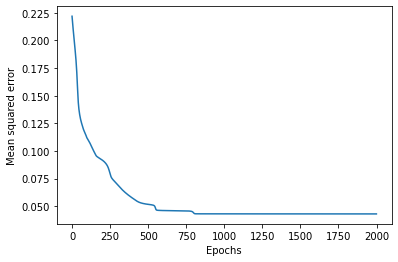

In [ ]:
sn.fit(X_scaled_train,y_scaled_train, epochs=2000, learning_rate = 0.01, display_loss = True)

In [ ]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [ ]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_train = accuracy_score(Y_pred_binarised_train, y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, y_binarised_test)

In [ ]:
accuracy_train, accuracy_test

(0.8196078431372549, 0.8023255813953488)

### Cross Entropy - Sample Code

In [1]:
X = [0.5,2.5]
Y = [0.2,0.9]

def f(w,b,x):
  # sigmoid with parameters w,b
  return 1.0 / (1.0 + np.exp(-(w*x + b)))

def error(w,b):
  err = 0.0
  for x,y in zip(X,Y):
    fx = f(w,b,x)
    err += -[(1-y) * math.log(1-fx, 2) + y * math.log(fx,2)]
  return err

def grad_b():
  fx = f(w, b, x)
  return (fx - y)

def grad_w(w,b,x,y):
  fx = f(w,b,x)
  return (fx - y) * x

def do_gradient_descent():
  w,b, eta = -2, -2, 1.0
  max_epochs = 1000
  for i in range(max_epochs):
    dw, db = 0, 0 
    for x,y in zip(X,Y):
      dw += grad_w(w,b,x,y)
      db += grad_b(w,b,x,y)
    w = w - eta * dw
    b = b - eta * db 
